## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [ ]:
!pip install scipy==1.2 --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 56.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scipy: filename=scipy-1.2.0-cp38-cp38-linux_x86_64.whl size=55397020 sha256=c09d3c77e08959e1ab48252bd95f4f2eb971332ffd680b0f539897c54c7986ea
  Stored in directory: /root/.cache/pip/wheels/d6/ed/d4/cfa6b554058a312b7dfc9bb6376cdec90b4083887f443eb3b1
Successfully built scipy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.5.1 requires scipy>=1.6, but you have scipy 1.2.0 which is incompatible.
pymc 4.1.4 requires scipy>=1.4.1, but you have scipy 1.2.0 which is inco

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [ ]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot
import matplotlib.pyplot as plt

### Importe o dataset

In [ ]:
dados = pd.read_csv('dados_projeto.csv') #lendo o arquivo csv
dados
##separando de maneira direta:
# dados = pd.read_csv('dados_projeto.csv', sep = ';')

,Y;X
0,25461;27.3
1,28972;27.02
2,30814;24.82
3,29799;23.98
4,28900;23.82
...,...
360,32307;24
361,26095;22.64
362,22309;21.68
363,20467;21.38


In [ ]:
dados[['Y','X']] = dados['Y;X'].str.split(';',expand = True)
dados  #separando as colunas Y e X


,Y;X,Y,X
0,25461;27.3,25461,27.3
1,28972;27.02,28972,27.02
2,30814;24.82,30814,24.82
3,29799;23.98,29799,23.98
4,28900;23.82,28900,23.82
...,...,...,...
360,32307;24,32307,24
361,26095;22.64,26095,22.64
362,22309;21.68,22309,21.68
363,20467;21.38,20467,21.38


### Visualize o conteúdo do DataFrame

In [ ]:
dados.head() #visualização dos dados

,Y;X,Y,X
0,25461;27.3,25461,27.3
1,28972;27.02,28972,27.02
2,30814;24.82,30814,24.82
3,29799;23.98,29799,23.98
4,28900;23.82,28900,23.82


In [ ]:
dados.drop(['Y;X'], axis= 'columns', inplace = True)
dados.head()  #excluindo coluna Y;X

,Y,X
0,25461,27.3
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [ ]:
dados = pd.DataFrame(dados).astype(float)
dados.head()

,Y,X
0,25461.0,27.30
1,28972.0,27.02
2,30814.0,24.82
3,29799.0,23.98
4,28900.0,23.82


In [ ]:
dados.shape

(365, 2)

### Obtenha e avalie as estatísticas descritivas dos dados

In [ ]:
dados.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

<AxesSubplot:title={'center':'Box plot - Consumo (L)'}, xlabel='Consumo (L)'>

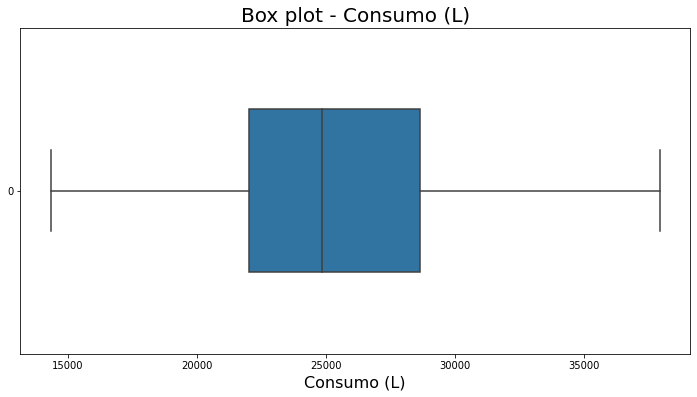

In [ ]:
ax = sns.boxplot(data=dados.Y, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot - Consumo (L)', fontsize=20)
ax.set_xlabel('Consumo (L)', fontsize=16)
ax


<AxesSubplot:title={'center':'Box plot - Temperatura'}, xlabel='Temperaruta (°C)'>

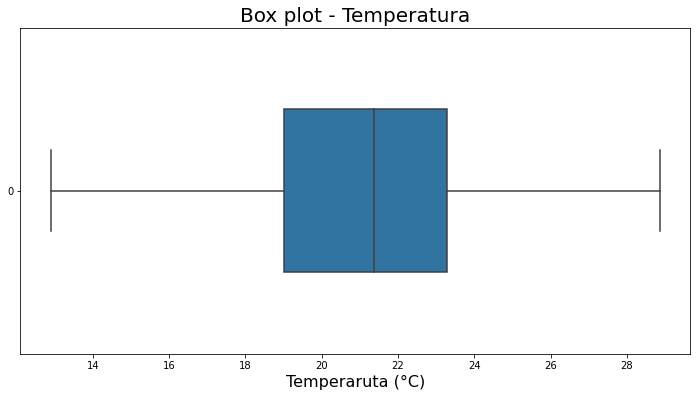

In [ ]:
ax = sns.boxplot(data=dados.X, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot - Temperatura', fontsize=20)
ax.set_xlabel('Temperaruta (°C)', fontsize=16)
ax


### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

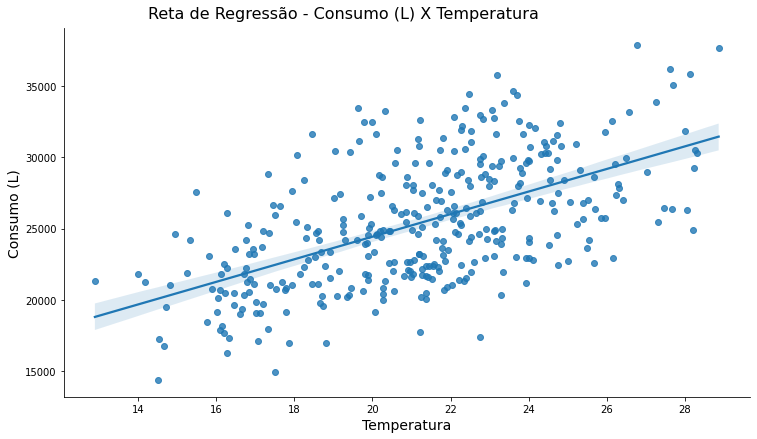

In [ ]:
ax = sns.lmplot(x="X", y="Y", data=dados)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Consumo (L) X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura", fontsize=14)
ax.set_ylabels("Consumo (L)", fontsize=14)
ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [ ]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Considerando a plotagem do gráfico é possível notar uma pequena relação entre as váriáveis, confirmada através da baixa correlação identificada na matriz

É possível quantificar a intensidade dessa relação?

Resp.: Sim, ela é de 0.574615

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não é possível afirmar a causalidade entre as duas variáveis, apenas a intensidade é possível de se afirmar.


### Prepare os dados para estimar um modelo de regressão linear simples

In [ ]:
Y = dados.Y
X = sm.add_constant(dados.X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Estime o modelo de regressão linear simples

In [ ]:
regressao = sm.OLS(Y,X).fit()

### Visualize o resultado da regressão

In [ ]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.87e-33
Time:                        00:54:10   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [ ]:
dados['Y_previsto'] = regressao.predict()
dados.head()

,Y,X,Y_previsto
0,25461.0,27.30,30229.200544
1,28972.0,27.02,30006.633434
2,30814.0,24.82,28257.891852
3,29799.0,23.98,27590.190521
4,28900.0,23.82,27463.009315


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [ ]:
regressao.predict([1,42])[0]

41913.97383816628

### Obtenha os resíduos da regressão

In [ ]:
dados['Residuos'] = regressao.resid
dados.head()

,Y,X,Y_previsto,Residuos
0,25461.0,27.30,30229.200544,-4768.200544
1,28972.0,27.02,30006.633434,-1034.633434
2,30814.0,24.82,28257.891852,2556.108148
3,29799.0,23.98,27590.190521,2208.809479
4,28900.0,23.82,27463.009315,1436.990685


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

Text(0, 0.5, 'Resíduos')

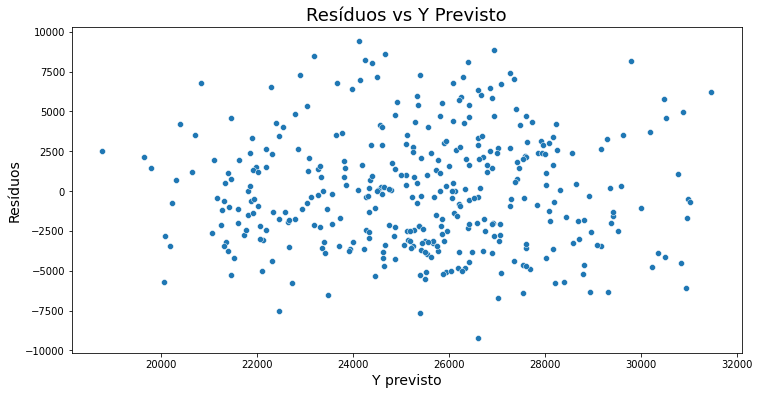

In [ ]:
ax = sns.scatterplot(x = dados.Y_previsto, y = dados.Residuos)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos vs Y Previsto', fontsize = 18)
ax.set_xlabel('Y previsto', fontsize = 14)
ax.set_ylabel('Resíduos', fontsize = 14)

### Obtenha o QQPlot dos resíduos

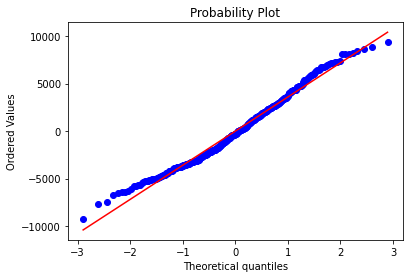

In [ ]:
(_, (_,_,_)) = probplot(dados.Residuos, plot = plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [ ]:
regressao.rsquared

0.330182049332432

In [ ]:
SQR = regressao.ess
SQR

2325899486.7377863

In [ ]:
SQT = dados.Y.apply(lambda y: (y - dados.Y.mean())**2).sum()
SQT

7044294174.805479

In [ ]:
SQE = regressao.ssr
SQE

4718394688.067693

In [ ]:
R2 = SQR / SQT
R2

0.33018204933243206